In [2]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import numpy as np

In [3]:
parques = gpd.read_file("../../../data/Cidade de São Paulo/Parques/PAR_22_RMSP_CEM/PAR_22_RMSP_CEM.shp")

In [38]:
parques.head(3)

,ID,AREA,DATA,MUN,DIST,CLAS_CEM,CATEG,INSTANC,NOM_TIPO,NOM_PREP,...,NOM_PR_A,NOM_A,NOM_ET_A,ANO,AREA_M2,AREA_HA,AREA_KM2,GESTAO,OBS,geometry
0,55450,0.020305,172,SANTO ANDRE,CAPUAVA,VERDE 6,PARQUE URBANO,MUNICIPAL,PARQUE,None,...,None,Centenário da Imigração Japonesa,Parque Centenário da Imigração Japonesa,NaN,20305,2.030509,0.020305,None,NORIO ARIMURA,"POLYGON ((-46.49479 -23.64378, -46.49510 -23.6..."
1,55464,0.024255,173,SAO PAULO,SAO RAFAEL,VERDE 6,PRACA,MUNICIPAL,PRACA,None,...,None,None,Praça,NaN,24255,2.425526,0.024255,None,None,"POLYGON ((-46.47639 -23.62655, -46.47654 -23.6..."
2,55478,0.030075,174,SAO PAULO,SAPOPEMBA,VERDE 5,PRACA,MUNICIPAL,PRACA,None,...,None,Humberto Reis Costa,Praça Humberto Reis Costa,NaN,30075,3.007530,0.030075,None,None,"POLYGON ((-46.49639 -23.61717, -46.49641 -23.6..."


In [5]:
parque = parques[parques["NOM_TIPO"] == "PARQUE"]

In [6]:
villa_lobos = parque[parque["NOM_A"] == "Villa Lobos"]

<AxesSubplot: >

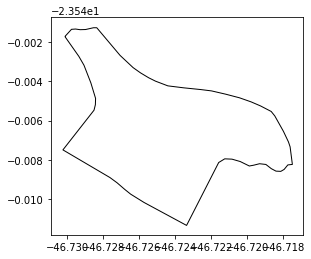

In [7]:
villa_lobos.plot(color="white", edgecolor='Black')

In [8]:
villa_lobos = villa_lobos[["NOM_A", "geometry"]]

In [9]:
villa_lobos["name"] = villa_lobos["NOM_A"]

villa_lobos['ID'] = np.arange(len(villa_lobos))
villa_lobos.set_index('ID', inplace=True)
villa_lobos["poly_type"] = "core"

C:\Users\gabri\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gabri\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gabri\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [10]:
villa_lobos

,NOM_A,geometry,name,poly_type
ID,,,,
0,Villa Lobos,"POLYGON ((-46.73015 -23.54170, -46.72978 -23.5...",Villa Lobos,core


## Saving

In [51]:
import os
dir = '../../../data/Cidade de São Paulo/Parques'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [52]:
villa_lobos.to_file(dir + '/villa_lobos.geojson')